# Análisis Exploratorio de Datos I

## Análisis del Problema y Solución Propuesta para Mejorar el Índice SAIDI

## Descripción del Problema

La organización se enfrenta a un problema crítico de incumplimiento de la meta mensual establecida para el índice SAIDI (System Average Interruption Duration Index). Actualmente, los resultados muestran que el SAIDI mensual está consistentemente por encima de lo esperado, lo que indica que los clientes están experimentando interrupciones del servicio de energía que son más largas de lo que la organización se había propuesto como objetivo.

## Razón para Utilizar Ciencia de Datos o Inteligencia Artificial

Considero que actualmente existen herramientas tanto en el campo de la ciencia de datos como de la inteligencia artificial que pueden ayudar a resolver esta problemática desde varios puntos de vista. Uno de ellos puede ser el análisis de clústeres, que permitiría agrupar eventos de interrupción del servicio por su causa en áreas y en equipos específicos. Esto permitiría dirigir esfuerzos operativos y recursos para el mantenimiento de estos y la posterior prevención o mitigación de estos eventos.

## Pregunta SMART

**¿Cómo se puede reducir el valor mensual del índice SAIDI en un 15% durante los próximos 12 meses, mediante la identificación y priorización de las causas recurrentes de interrupciones del servicio eléctrico utilizando técnicas de análisis de clústeres?**

## Importación de librerias

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importacion del dataset 

In [77]:
df = pd.read_excel('indice_saidi - prueba.xlsx')
print(df.head())

               DIRECCION              EQUIPO_OPERO     OWNER  OUTAGE_NO  \
0    Cra. 11D No. 33B-24            5224250-RI.097     SCADA     189068   
1                    NaN         01308-SILOE_SWING     SCADA     189069   
2  SUBESTACION DIESEL II  5291755-CB04302-ARANJUEZ     SCADA     189070   
3   SUBESTACION DIESEL I    5268451-CB03312-OBRERO     SCADA     189071   
4                    NaN            LineCut - 7505  bomesias     189072   

   EVENTOCORTE  EVENTOCIERRE   ANO  MES            APERTURA  \
0       197964        197965  2024    1 2024-01-01 05:23:30   
1       197966        197969  2024    1 2024-01-01 05:32:35   
2       197970        197971  2024    1 2024-01-01 05:36:23   
3       197972        197973  2024    1 2024-01-01 06:00:31   
4       197974        197996  2024    1 2024-01-01 06:05:15   

               CIERRE  ...  META SAIFI_DIA REAL  meta SAIDI diaria acumulada  \
0 2024-01-01 05:23:50  ...             0.021613                     1.650968   
1 2024-01-

## Visualizamos el tipo de dato de cada columna

In [78]:
print(df.dtypes)

DIRECCION                                   object
EQUIPO_OPERO                                object
OWNER                                       object
OUTAGE_NO                                    int64
EVENTOCORTE                                  int64
EVENTOCIERRE                                 int64
ANO                                          int64
MES                                          int64
APERTURA                            datetime64[ns]
CIERRE                              datetime64[ns]
MINUTOS                                    float64
HORAS                                      float64
COD_CIRCUITO                                 int64
CIRCUITO                                    object
TRAFOS                                       int64
CLASIFICACION                               object
CLIENTES_AFF                                 int64
EXCLUSION                                   object
CAUSA                                        int64
DESCRIPCION                    

## Revisión

In [79]:
df.describe()

,OUTAGE_NO,EVENTOCORTE,EVENTOCIERRE,ANO,MES,APERTURA,CIERRE,MINUTOS,HORAS,COD_CIRCUITO,...,meta semanal SAIDI min ACUMULADO,SAIFI semana ACUMULADO,META SAIDI_DIA REAL,META SAIFI_DIA REAL,meta SAIDI diaria acumulada,meta SAIfI diaria acumulada,META SAIDI REAL HORAS MES,META SAIFI REAL HORAS MES,META SAIDI SEMANAL,META SAIFI SEMANAL
count,7981.000000,7981.000000,7981.000000,7981.0,7981.000000,7981,7981,7981.000000,7981.000000,7981.000000,...,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7.981000e+03,7.981000e+03
mean,205318.053251,209367.895878,209878.904523,2024.0,4.369001,2024-04-27 07:52:04.182308096,2024-04-27 12:02:22.995364096,250.313357,4.172595,11678.790753,...,216.162880,2.578368,2.043466,0.024282,254.084511,2.993933,4.737035,3.352753,1.426755e+01,1.730769e-01
min,189068.000000,0.000000,197965.000000,2024.0,1.000000,2024-01-01 05:23:30,2024-01-01 05:23:50,0.000000,0.000000,1304.000000,...,12.414340,0.148077,1.650968,0.019762,1.650968,0.021613,0.853000,0.670000,1.426755e+01,1.730769e-01
25%,197431.000000,204369.000000,204423.000000,2024.0,3.000000,2024-03-18 16:24:38,2024-03-18 17:40:55,2.130000,0.040000,4304.000000,...,148.972075,1.776923,1.789398,0.021613,174.686207,2.050529,3.473641,2.469800,1.426755e+01,1.730769e-01
50%,205839.000000,210034.000000,210068.000000,2024.0,4.000000,2024-04-30 06:33:33,2024-04-30 13:39:50,84.830000,1.410000,10319.000000,...,223.458113,2.665385,1.896348,0.022566,272.249117,3.223918,4.537485,3.223918,1.426755e+01,1.730769e-01
75%,213313.000000,215641.000000,215660.000000,2024.0,6.000000,2024-06-13 13:48:09,2024-06-13 16:42:00,240.880000,4.010000,20302.000000,...,297.944151,3.553846,2.127688,0.025137,354.298074,4.129911,6.411964,4.513535,1.426755e+01,1.730769e-01
max,220157.000000,221344.000000,221345.000000,2024.0,8.000000,2024-08-05 23:24:45,2024-08-05 23:33:18,12171.270000,202.850000,50520.000000,...,397.258868,4.738462,2.648276,0.032252,449.278334,5.364503,8.440724,6.158076,1.426755e+01,1.730769e-01
std,9150.611104,12199.929260,6661.033860,0.0,1.904891,NaN,NaN,558.925022,9.315116,8305.271223,...,102.523769,1.222893,0.340470,0.003920,123.249158,1.441179,2.022387,1.431312,7.105873e-15,2.775731e-17


## Revision de datos nulos en el dataset y tipo de datos

In [80]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7981 entries, 0 to 7980
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   DIRECCION                         7176 non-null   object        
 1   EQUIPO_OPERO                      7981 non-null   object        
 2   OWNER                             7981 non-null   object        
 3   OUTAGE_NO                         7981 non-null   int64         
 4   EVENTOCORTE                       7981 non-null   int64         
 5   EVENTOCIERRE                      7981 non-null   int64         
 6   ANO                               7981 non-null   int64         
 7   MES                               7981 non-null   int64         
 8   APERTURA                          7981 non-null   datetime64[ns]
 9   CIERRE                            7981 non-null   datetime64[ns]
 10  MINUTOS                           7981 non-null 

## Realizamos en conteo de valores nulos por cada variable

In [81]:
# Contar valores nulos en cada columna
valores_nulos = df.isnull().sum()
print("Valores nulos por columna:\n", valores_nulos)

Valores nulos por columna:
 DIRECCION                           805
EQUIPO_OPERO                          0
OWNER                                 0
OUTAGE_NO                             0
EVENTOCORTE                           0
EVENTOCIERRE                          0
ANO                                   0
MES                                   0
APERTURA                              0
CIERRE                                0
MINUTOS                               0
HORAS                                 0
COD_CIRCUITO                          0
CIRCUITO                              0
TRAFOS                                0
CLASIFICACION                         0
CLIENTES_AFF                          0
EXCLUSION                             0
CAUSA                                 0
DESCRIPCION                           0
OBSERVACIONES                         1
TOTAL_CLIENTES                        0
SAIDI                                 0
SAIFI                                 0
SAIDI en min

## ANÁLISIS UNIVARIADO

### Visualización diagrama de dispersión de la variable minutos

<function matplotlib.pyplot.show(close=None, block=None)>

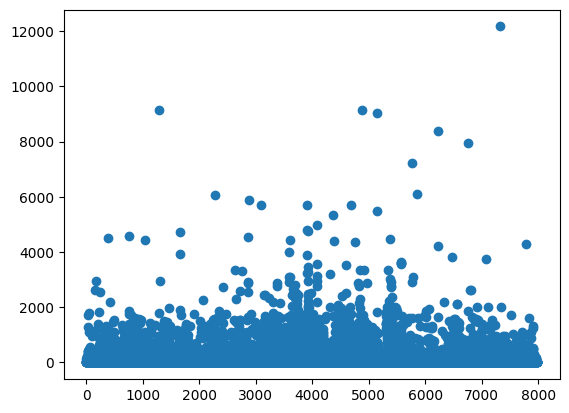

In [82]:
plt.scatter(df.index, df['MINUTOS'])
plt.show

<Axes: xlabel='None', ylabel='MINUTOS'>

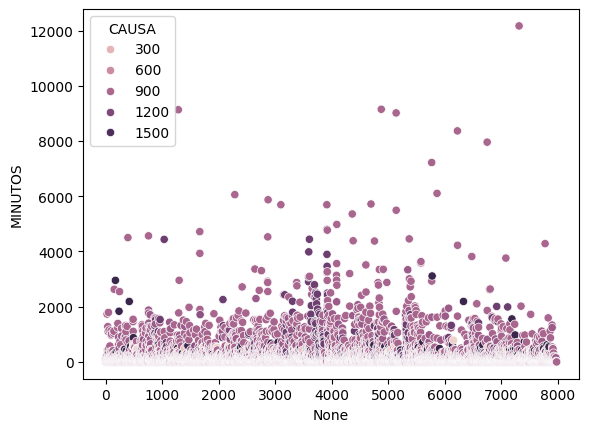

In [83]:
sns.scatterplot(x=df.index, y=df['MINUTOS'], hue=df['CAUSA'])

## Visualizacion de histograma de la variable minutos

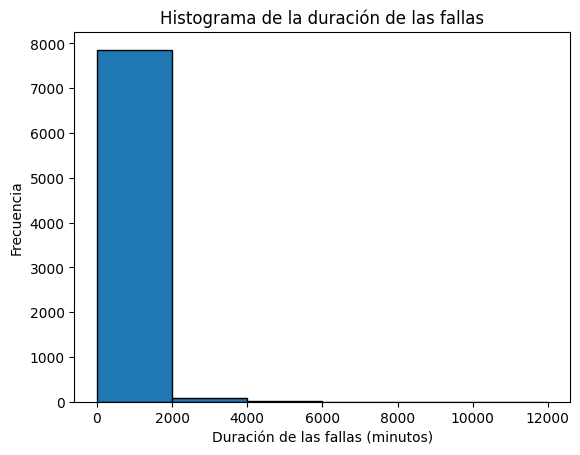

In [84]:
bins = np.arange(0, 13000, 2000)
plt.hist(df['MINUTOS'], bins=bins, edgecolor='black')
plt.title('Histograma de la duración de las fallas')
plt.xlabel('Duración de las fallas (minutos)')
plt.ylabel('Frecuencia')
plt.xticks(bins)
plt.show()

## Visualización de un diagrama Boxplot de la variable minutos

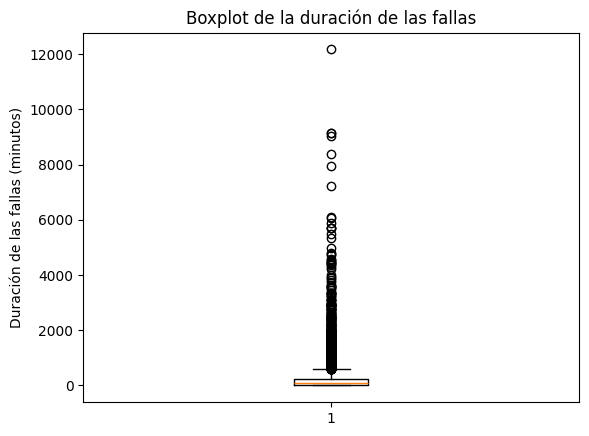

In [85]:
plt.boxplot(df['MINUTOS'])
plt.title('Boxplot de la duración de las fallas')
plt.ylabel('Duración de las fallas (minutos)')
plt.show()

# ANALISIS BIVARIADO

En el análisis bivariado se analizan las variables "MINUTOS" Y "CAUSA" con el fin de observar cuales son las causas (fallas) con mas minutos en su tiempos de atencion  asi mismo para observar cuales son las fallas con mas promedio de atención.

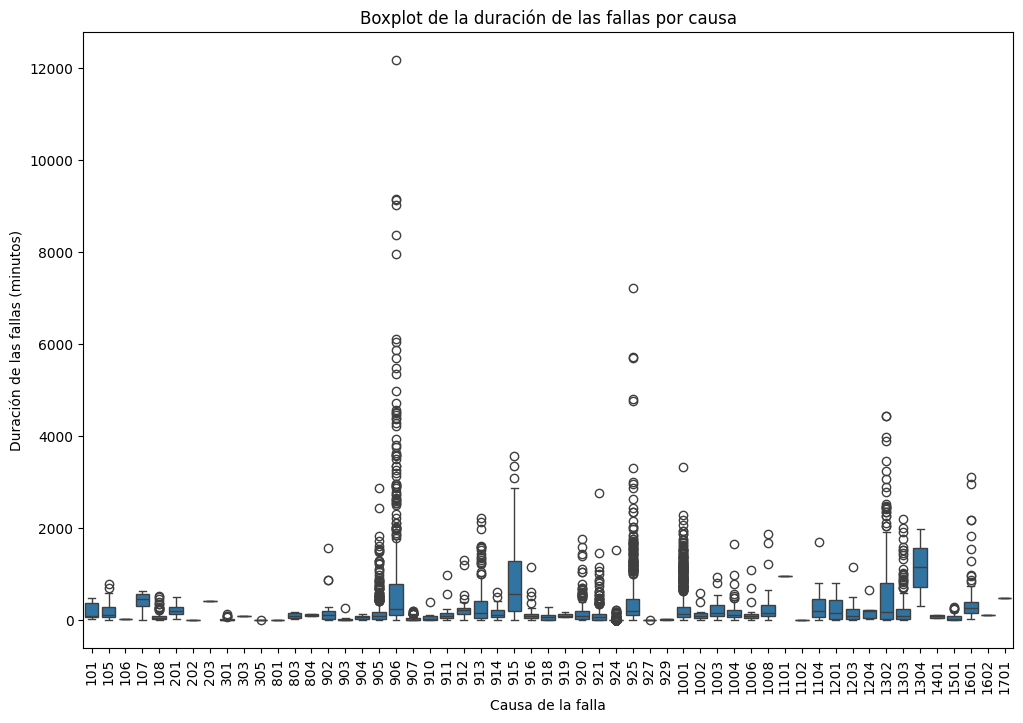

In [86]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='CAUSA', y='MINUTOS', data=df)
plt.title('Boxplot de la duración de las fallas por causa')
plt.ylabel('Duración de las fallas (minutos)')
plt.xlabel('Causa de la falla')
plt.xticks(rotation=90)  # Rotar etiquetas
plt.show()

### Nueva columna codigo causa y descripcion

Con el fin de poder realizar análisis posteriores se crea una nueva columna en el dataset llamada "causa_completa" la cual concatena las columnas CAUSA y DESCRIPCION, asi mismo se muestran los valores unicos de esta nueva columna y se guardan en un archivo txt que se puede encontrar en este mismo repositorio. 

In [87]:
# Crear una nueva columna combinada que une el código de la causa y su descripción
df['causa_completa'] = df['CAUSA'].astype(str) + ' - ' + df['DESCRIPCION']

# Mostrar las primeras filas del DataFrame para verificar la nueva columna
valores_unicos = df['causa_completa'].unique()
for valor in sorted(valores_unicos):
    print(valor)

with open('causas_fallas_unicas.txt', 'w') as f:
    for valor in sorted(valores_unicos):
        f.write(f"{valor}\n")

1001 - OBJETOS SOBRE RED - ARBOLES O RAMAS - VEGETACION
1002 - OBJETOS SOBRE RED - COMETAS
1003 - OBJETOS SOBRE RED - GATOS - ROEDORES Y OTROS
1004 - OBJETOS SOBRE RED - AVES
1006 - OBJETOS SOBRE RED - OTROS OBJETOS
1008 - OBJETOS SOBRE RED - VEHICULOS
101 - REF DE RED PRIMARIA - OP Y MTTO RED AEREA
105 - REF DE RED PRIMARIA - PROYECTOS EMCALI EICE ESP
106 - REF DE RED PRIMARIA - PROY EXPANSION UPME-CREG
107 - REF DE RED PRIMARIA - POT Y OBRAS MUNICIPALESG
108 - REF DE RED SECUNDARIA - PROYECTOS EMCALI EICE ESP
1101 - VANDALISMO - ASONADA Y TERRORISMO
1102 - VANDALISMO - HURTO CALIFICADO
1104 - VANDALISMO - HURTO CALIFICADO
1201 - SEGURIDAD PUBLICA - INCENDIO
1203 - SEGURIDAD CIUDADANA
1204 - RIESGO DE LA VIDA HUMANA DEL RETIE
1302 - VENDAVAL
1303 - DESCARGAS ATMOSFERICAS - METEOROLOGIA
1304 - DERRUMBES-DESLIZAMIENTOS
1401 - ACCIDENTE OCURRIDO A PERSONAL - RED EMCALI
1501 - MANIOBRA POR TRANSFERENCIA DE CARGA
1601 - APERTURA SOLICITADA POR EL CLIENTE
1602 - INCUMPLIMIENTO CONTRATO DE S

### Gráfico de barras del análisis bivariado entre las variables causa y descripcion

Se utiliza un gráfico de barras para observar el promedio de las fallas con un mayor promedio de duración

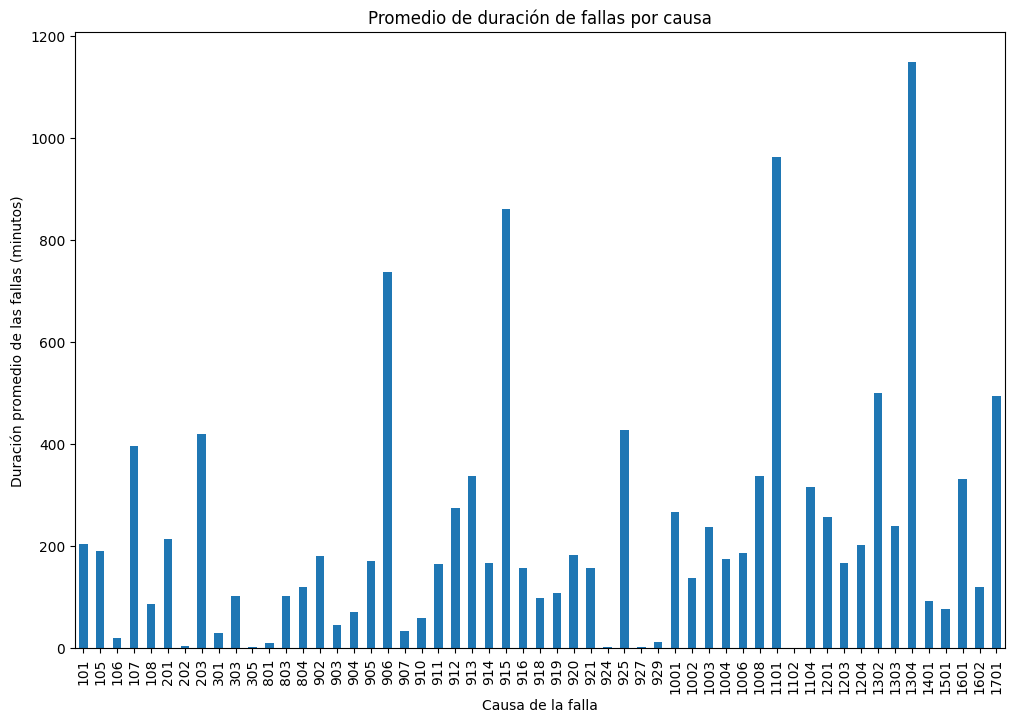

In [88]:
# Gráfico de barras del promedio de duración de fallas por causa
plt.figure(figsize=(12, 8))
df.groupby('CAUSA')['MINUTOS'].mean().plot(kind='bar')
plt.title('Promedio de duración de fallas por causa')
plt.ylabel('Duración promedio de las fallas (minutos)')
plt.xlabel('Causa de la falla')
plt.xticks(rotation=90)
plt.show()

### Cálculo correlaciones entre las variables minutos y causa

Para el cálculo de correlación entre las dos variables del análisis bivariado se utiliza la correlación de pearson y spearman, arrojando unos valores positivos pero muy bajos lo que indica que la variable causa no tiene un efecto o no influye significativamente con la duracion de las fallas.

In [89]:
correlacion_pearson = df['MINUTOS'].corr(df['CAUSA'], method='pearson')
correlacion_spearman = df['MINUTOS'].corr(df['CAUSA'], method='spearman')
print(f'Correlación de Pearson: {correlacion_pearson}')
print(f'Correlación de spearman: {correlacion_spearman}')

Correlación de Pearson: 0.07096259813036723
Correlación de spearman: 0.10439130977571531


### Cálculo correlaciones entre las variables minutos, causa y código del circuito

Con el fin explorar otras posibles relaciones con otras variables del dataset se calculan las correlaciones de pearson y spearman entre las variables minutos, causa y cod_circuito, para lo cual se muestran las matrices de los dos métodos encontrando que persisten valores bajos de correlacion entre estas variables, de igual manera persisten los valores bajos para la correlacion de pearson lo que indica que estas variables no tienen una relacion lineal entre si.

In [90]:

# Seleccionar solo las columnas de interés
variables_interes = ['MINUTOS', 'CAUSA', 'COD_CIRCUITO']
df_seleccion = df[variables_interes]

# Calcular la matriz de correlación solo para las variables seleccionadas
correlacion_seleccionadas = df_seleccion.corr()
correlacion_seleccionadasSp = df_seleccion.corr(method='spearman')

# Matriz correlacion de pearson
print("Matriz correlación de Pearson")
print(correlacion_seleccionadas)

# Matriz correlacion spearmen
print("Matriz correlación de Spearman")
print(correlacion_seleccionadasSp)

Matriz correlación de Pearson
               MINUTOS     CAUSA  COD_CIRCUITO
MINUTOS       1.000000  0.070963      0.053247
CAUSA         0.070963  1.000000      0.035989
COD_CIRCUITO  0.053247  0.035989      1.000000
Matriz correlación de Spearman
               MINUTOS     CAUSA  COD_CIRCUITO
MINUTOS       1.000000  0.104391      0.058876
CAUSA         0.104391  1.000000      0.024759
COD_CIRCUITO  0.058876  0.024759      1.000000


### Mapa de calor para la correlacion de pearson

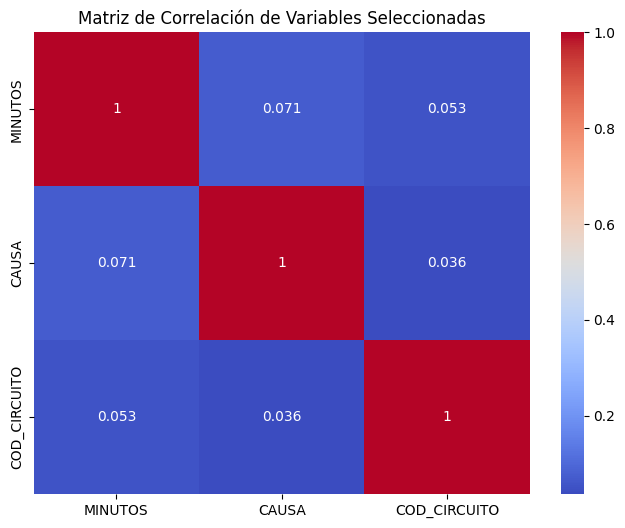

In [91]:
# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion_seleccionadas, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Variables Seleccionadas')
plt.show()

### Mapa de calos para la correlacion de spearman

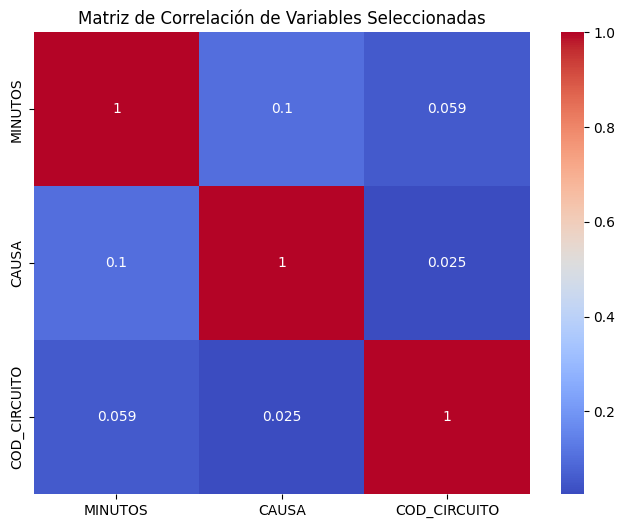

In [92]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion_seleccionadasSp, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Variables Seleccionadas')
plt.show()

## Preparación de los datos

## One hot encoding para la variable causa

Se selecciona el metodo one hot encoding para la variable causa debido a que nos encontramos con una variable nominal que contiene la codificación de las fallas, sin embargo esta codificación no tiene una escala y no es cuantitativa por lo que se decide utilizar este metodo para la preparacion de esta variable, de igual manera es necesario mencionar que hay muchas causalidades de fallas lo que aumenta el tamaño del dataset.

In [93]:
# Aplicar One-Hot Encoding a la columna "CAUSA"
df_encoded = pd.get_dummies(df, columns=['CAUSA'], drop_first=True)

# Verificar las nuevas columnas creadas
df_encoded.head()



,DIRECCION,EQUIPO_OPERO,OWNER,OUTAGE_NO,EVENTOCORTE,EVENTOCIERRE,ANO,MES,APERTURA,CIERRE,...,CAUSA_1203,CAUSA_1204,CAUSA_1302,CAUSA_1303,CAUSA_1304,CAUSA_1401,CAUSA_1501,CAUSA_1601,CAUSA_1602,CAUSA_1701
0,Cra. 11D No. 33B-24,5224250-RI.097,SCADA,189068,197964,197965,2024,1,2024-01-01 05:23:30,2024-01-01 05:23:50,...,False,False,False,False,False,False,False,False,False,False
1,NaN,01308-SILOE_SWING,SCADA,189069,197966,197969,2024,1,2024-01-01 05:32:35,2024-01-01 05:33:01,...,False,False,False,False,False,False,False,False,False,False
2,SUBESTACION DIESEL II,5291755-CB04302-ARANJUEZ,SCADA,189070,197970,197971,2024,1,2024-01-01 05:36:23,2024-01-01 05:37:20,...,False,False,False,False,False,False,False,False,False,False
3,SUBESTACION DIESEL I,5268451-CB03312-OBRERO,SCADA,189071,197972,197973,2024,1,2024-01-01 06:00:31,2024-01-01 06:01:28,...,False,False,False,False,False,False,False,False,False,False
4,NaN,LineCut - 7505,bomesias,189072,197974,197996,2024,1,2024-01-01 06:05:15,2024-01-01 06:40:00,...,False,False,False,False,False,False,False,False,False,False


### Matriz de correlacion de las variables minutos, causa y cod_circuito

Una vez aplicado el metodo one hot encoding para la variable causa se procede a calcular nuevamente la matriz de correlacion 

In [94]:
# Convertir las columnas booleanas generadas por One-Hot Encoding a enteros
df_encoded[df_encoded.columns[df_encoded.columns.str.contains('CAUSA_')]] = df_encoded[df_encoded.columns[df_encoded.columns.str.contains('CAUSA_')]].astype(int)

# Seleccionar columnas : 'MINUTOS', 'COD_CIRCUITO', y las generadas que inician por'CAUSA'
columnas_interes = ['MINUTOS', 'COD_CIRCUITO'] + [col for col in df_encoded.columns if col.startswith('CAUSA_')]

# Filtrar solo las columnas de interes en el DataFrame
df_seleccion = df_encoded[columnas_interes]

# Calcular la matriz de correlación solo para las columnas seleccionadas
#correlacion_seleccionadas = df_seleccion.corr()
correlacion_seleccionadas = df_seleccion.corr(method="spearman")


# Mostrar la matriz de correlación para las variables seleccionadas
print(correlacion_seleccionadas)

               MINUTOS  COD_CIRCUITO  CAUSA_105  CAUSA_106  CAUSA_107  \
MINUTOS       1.000000      0.058876   0.046261  -0.006226   0.038002   
COD_CIRCUITO  0.058876      1.000000   0.011059   0.006733   0.010244   
CAUSA_105     0.046261      0.011059   1.000000  -0.001418  -0.005116   
CAUSA_106    -0.006226      0.006733  -0.001418   1.000000  -0.000452   
CAUSA_107     0.038002      0.010244  -0.005116  -0.000452   1.000000   
CAUSA_108    -0.014072     -0.006150  -0.015780  -0.001395  -0.005033   
CAUSA_201     0.064946     -0.044579  -0.013062  -0.001155  -0.004166   
CAUSA_202    -0.008444     -0.005105  -0.001418  -0.000125  -0.000452   
CAUSA_203     0.013652     -0.006833  -0.001418  -0.000125  -0.000452   
CAUSA_301    -0.030972      0.004135  -0.007909  -0.000699  -0.002522   
CAUSA_303     0.002526      0.024183  -0.002005  -0.000177  -0.000639   
CAUSA_305    -0.019870     -0.020817  -0.003171  -0.000280  -0.001011   
CAUSA_801    -0.010757      0.000552  -0.002005  -0

In [95]:
df_encoded.head()

,DIRECCION,EQUIPO_OPERO,OWNER,OUTAGE_NO,EVENTOCORTE,EVENTOCIERRE,ANO,MES,APERTURA,CIERRE,...,CAUSA_1203,CAUSA_1204,CAUSA_1302,CAUSA_1303,CAUSA_1304,CAUSA_1401,CAUSA_1501,CAUSA_1601,CAUSA_1602,CAUSA_1701
0,Cra. 11D No. 33B-24,5224250-RI.097,SCADA,189068,197964,197965,2024,1,2024-01-01 05:23:30,2024-01-01 05:23:50,...,0,0,0,0,0,0,0,0,0,0
1,NaN,01308-SILOE_SWING,SCADA,189069,197966,197969,2024,1,2024-01-01 05:32:35,2024-01-01 05:33:01,...,0,0,0,0,0,0,0,0,0,0
2,SUBESTACION DIESEL II,5291755-CB04302-ARANJUEZ,SCADA,189070,197970,197971,2024,1,2024-01-01 05:36:23,2024-01-01 05:37:20,...,0,0,0,0,0,0,0,0,0,0
3,SUBESTACION DIESEL I,5268451-CB03312-OBRERO,SCADA,189071,197972,197973,2024,1,2024-01-01 06:00:31,2024-01-01 06:01:28,...,0,0,0,0,0,0,0,0,0,0
4,NaN,LineCut - 7505,bomesias,189072,197974,197996,2024,1,2024-01-01 06:05:15,2024-01-01 06:40:00,...,0,0,0,0,0,0,0,0,0,0


### Correlacion de spearman luego de One hot encoding

Luego de la preparacion de los datos de la columna causa se procede a calcular la correlacion de spearman nuevamente entre las variables minutos y causa, sin embargo la correlacion no aumenta luego de esto, lo que nos indica que hay una relacion no lineal entre estas variables pero esta tambien es muy debil.

In [96]:
correlacion_spearmanvf = df_encoded['MINUTOS'].corr(df['CAUSA'], method='spearman')
print(f"Correlacion spearman {correlacion_spearmanvf}")

Correlacion spearman 0.10439130977571531


In [97]:
# Guardar la matriz de correlación en un archivo Excel
correlacion_seleccionadas.to_excel('matriz_correlacion.xlsx', index=True)

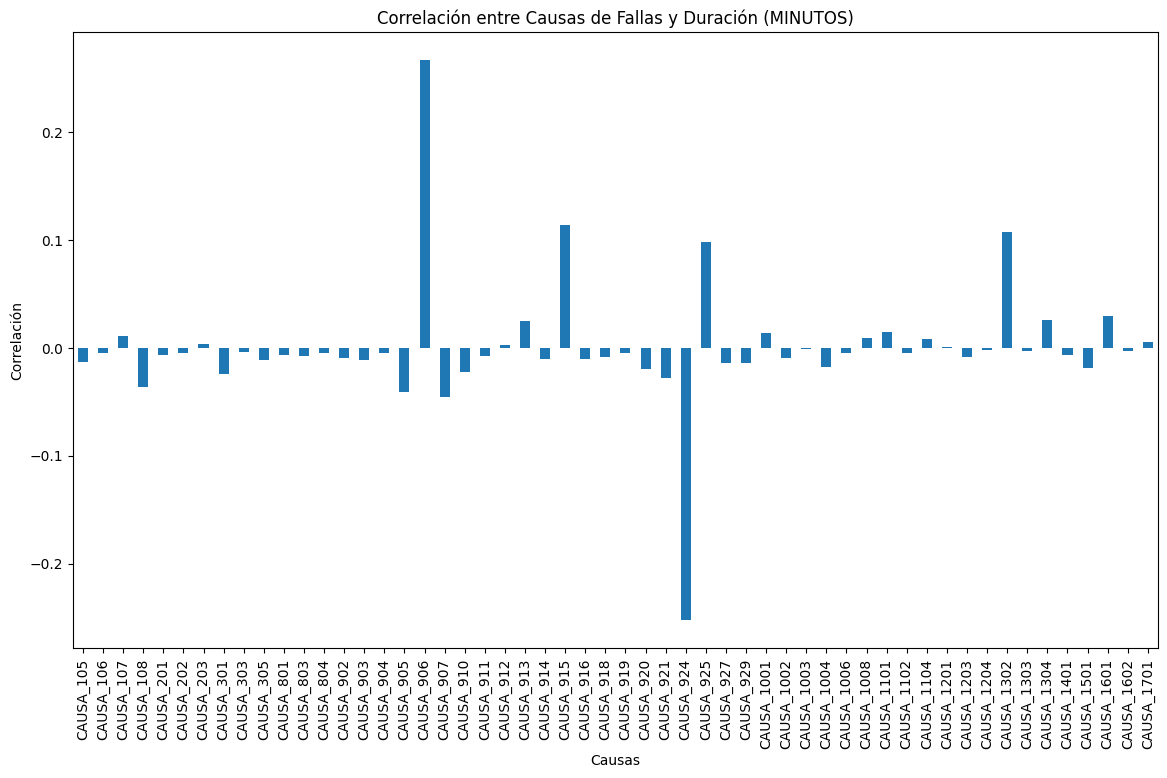

In [105]:
df_numeric = df_encoded.select_dtypes(include=['float64', 'int64', 'uint8'])

# Calcular la matriz de correlación solo para las variables numéricas
correlaciones = df_numeric.corr()

# Filtrar las correlaciones con 'MINUTOS' para aquellas columnas que contengan 'CAUSA'
correlaciones_causa_minutos = correlaciones['MINUTOS'].filter(like='CAUSA')

# Graficar las correlaciones filtradas
correlaciones_causa_minutos.plot(kind='bar', figsize=(14, 8))
plt.title('Correlación entre Causas de Fallas y Duración (MINUTOS)')
plt.ylabel('Correlación')
plt.xlabel('Causas')
plt.show()

### Pipeline para extraer fecha y hora de la fallas

In [45]:
# pipeline & transformer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


In [46]:
def extract_date(X):
    # Convertir a datetime si aún no lo está
    X = pd.to_datetime(X)
    return X.dt.date.values.reshape(-1, 1)  # Extraer solo la fecha

def extract_time(X):
    # Convertir a datetime si aún no lo está
    X = pd.to_datetime(X)
    return X.dt.time.values.reshape(-1, 1)  # Extraer solo la hora

In [47]:
date_pipeline = ColumnTransformer(transformers=[
    ('extract_date', FunctionTransformer(extract_date), 'APERTURA'),
    ('extract_time', FunctionTransformer(extract_time), 'APERTURA')
])

In [49]:
# Suponiendo que 'df' es tu DataFrame
df_transformed = date_pipeline.fit_transform(df)

# Convertir el resultado del pipeline a DataFrame
df_transformed = pd.DataFrame(df_transformed, columns=['FECHA', 'HORA'])

# Concatenar el resultado con el dataset original
df_final = pd.concat([df, df_transformed], axis=1)

# Mostrar las primeras filas del nuevo dataset
df_final.head()

,DIRECCION,EQUIPO_OPERO,OWNER,OUTAGE_NO,EVENTOCORTE,EVENTOCIERRE,ANO,MES,APERTURA,CIERRE,...,META SAIDI REAL HORAS MES,META SAIFI REAL HORAS MES,META SAIDI SEMANAL,META SAIFI SEMANAL,mayor o igual a 3 min,mas afectados mantto,RECONECTADORES/CB,causa_completa,FECHA,HORA
0,Cra. 11D No. 33B-24,5224250-RI.097,SCADA,189068,197964,197965,2024,1,2024-01-01 05:23:30,2024-01-01 05:23:50,...,0.853,0.67,14.267547,0.173077,MENOR,NO,Reconectador,924 - FALLA TRANSITORIA...,2024-01-01,05:23:30
1,NaN,01308-SILOE_SWING,SCADA,189069,197966,197969,2024,1,2024-01-01 05:32:35,2024-01-01 05:33:01,...,0.853,0.67,14.267547,0.173077,MENOR,NO,CB,924 - FALLA TRANSITORIA...,2024-01-01,05:32:35
2,SUBESTACION DIESEL II,5291755-CB04302-ARANJUEZ,SCADA,189070,197970,197971,2024,1,2024-01-01 05:36:23,2024-01-01 05:37:20,...,0.853,0.67,14.267547,0.173077,MENOR,NO,CB,924 - FALLA TRANSITORIA...,2024-01-01,05:36:23
3,SUBESTACION DIESEL I,5268451-CB03312-OBRERO,SCADA,189071,197972,197973,2024,1,2024-01-01 06:00:31,2024-01-01 06:01:28,...,0.853,0.67,14.267547,0.173077,MENOR,NO,CB,924 - FALLA TRANSITORIA...,2024-01-01,06:00:31
4,NaN,LineCut - 7505,bomesias,189072,197974,197996,2024,1,2024-01-01 06:05:15,2024-01-01 06:40:00,...,0.853,0.67,14.267547,0.173077,MAYOR,NO,0,902 - FALLA EQUIPO DE LA RED PRIMARIA,2024-01-01,06:05:15


In [50]:
# Convertir la columna 'HORA' al formato de datetime
df_final['HORA'] = pd.to_datetime(df_final['HORA'], format='%H:%M:%S').dt.hour

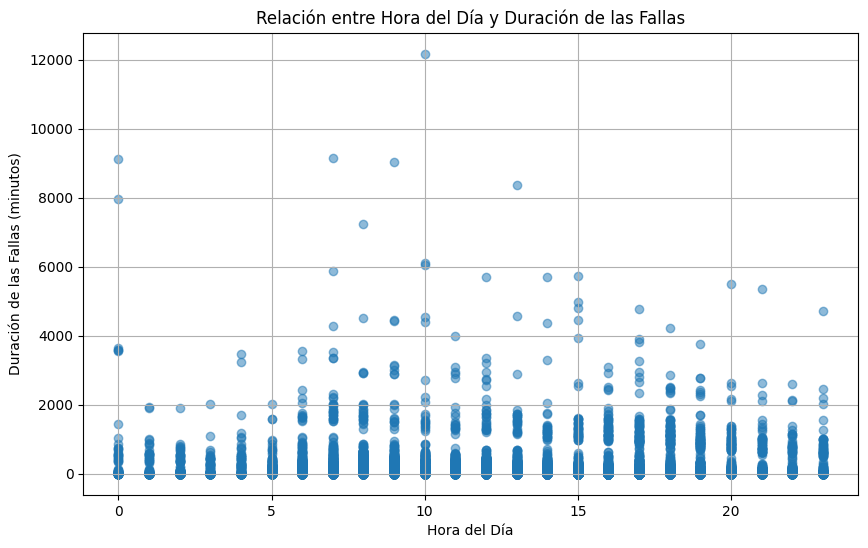

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(df_final['HORA'], df_final['MINUTOS'], alpha=0.5)
plt.title('Relación entre Hora del Día y Duración de las Fallas')
plt.xlabel('Hora del Día')
plt.ylabel('Duración de las Fallas (minutos)')
plt.grid(True)
plt.show()

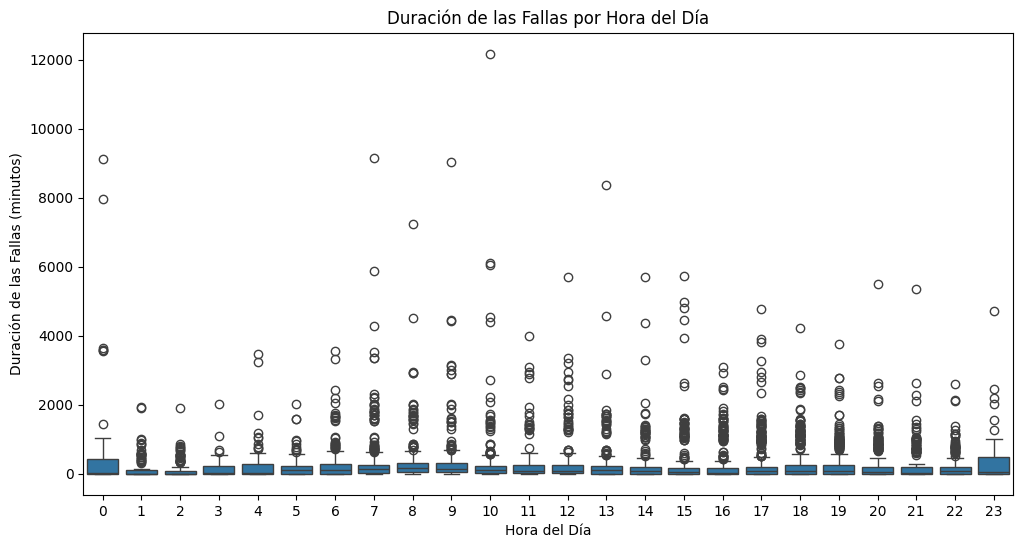

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='HORA', y='MINUTOS', data=df_final)
plt.title('Duración de las Fallas por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Duración de las Fallas (minutos)')
plt.show()